# Predição de atrasos em vôos
------------------------

In [3]:
import pandas as pd
import utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scienceplots
plt.style.use('science')

## Descrição do *dataset*
----------------------

In [4]:
airlines = pd.read_csv('airlines_delay.csv')
airlines['Flight'] = airlines['Flight'].astype('O')
airlines.head(10)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
5,3692.0,580.0,60.0,WN,MSY,BHM,4,0
6,1135.0,690.0,239.0,CO,EWR,DFW,4,0
7,1300.0,1210.0,80.0,AA,DFW,MEM,3,0
8,587.0,1295.0,105.0,FL,BWI,GRR,7,0
9,764.0,530.0,108.0,FL,ATL,PBI,3,0


In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  object 
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 32.9+ MB


In [6]:
cat_features = airlines.select_dtypes(include='object').columns.tolist()
num_features = airlines.select_dtypes(include='number').columns.tolist()

print(f'Categorical features: {cat_features}')
print(f'Numerical features: {num_features}')

Categorical features: ['Flight', 'Airline', 'AirportFrom', 'AirportTo']
Numerical features: ['Time', 'Length', 'DayOfWeek', 'Class']


In [7]:
airlines['Class'].value_counts(normalize=True)

0    0.554557
1    0.445443
Name: Class, dtype: float64

- Possui em torno de 55% dos vôos atrasados
- Dados aparentemente suficientemente balanceados

In [8]:
#utils.distribution_plot(airlines, exclude_columns=['AirportFrom', 'AirportTo'])

In [9]:
airlines.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,539382.0,802.728161,278.045546,10.0,565.0,795.0,1035.0,1439.0
Length,539382.0,132.202104,70.117045,0.0,81.0,115.0,162.0,655.0
DayOfWeek,539382.0,3.929666,1.914666,1.0,2.0,4.0,5.0,7.0
Class,539382.0,0.445443,0.497015,0.0,0.0,0.0,1.0,1.0


- Tempo é a hora de saída em minutos
- Distância máxima de 655 km

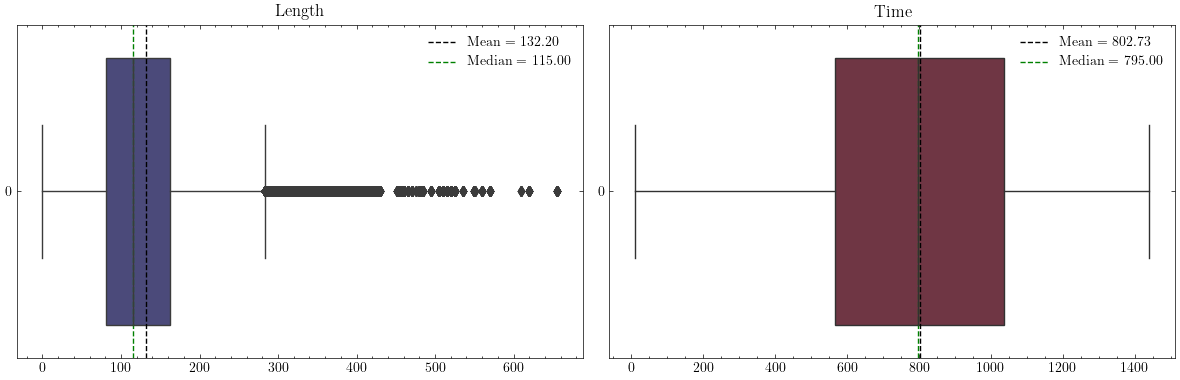

In [10]:
utils.plot_boxplots(airlines, ['Length', 'Time'])

- Bastante *outliers* na distância do vôo. 
- A maioria dos vôos saem entre de 10h da manhã e 17h da tarde.

## Análise Exploratória
-----------

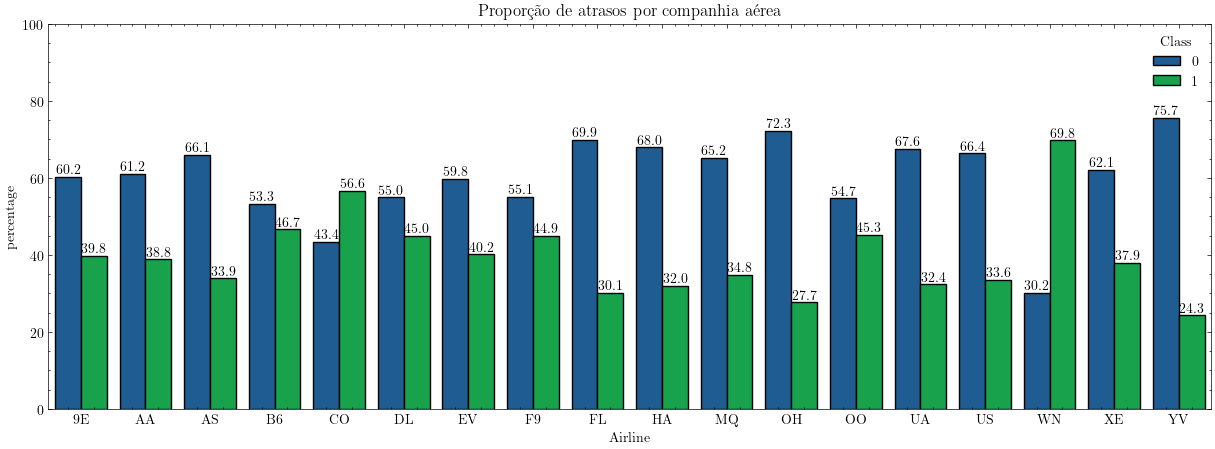

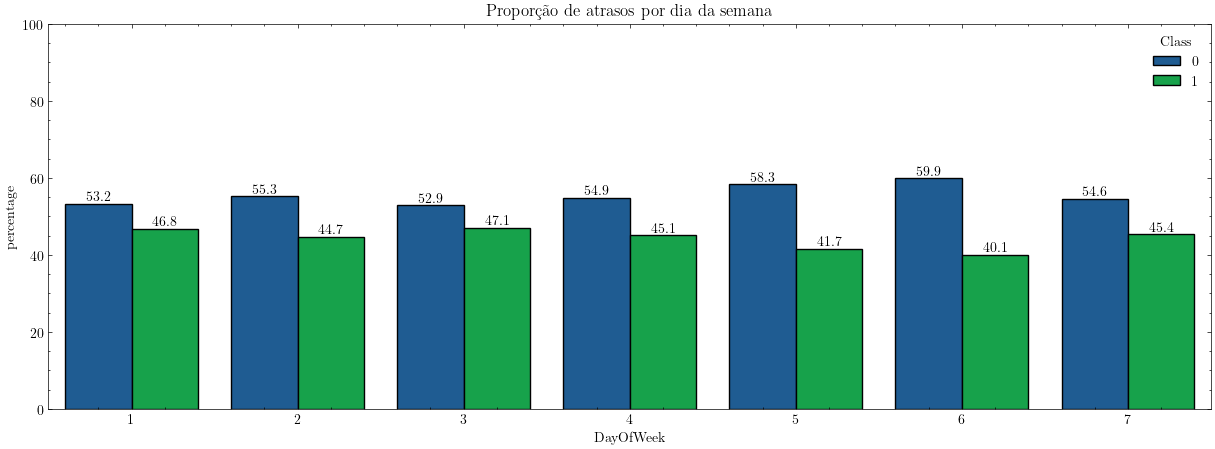

In [11]:
# plot multiple subplots

fig = plt.figure(figsize=(15, 5))
utils.plot_norm_countplot(airlines, category_col='Airline', hue_col='Class', xticks_rotation=0, edgecolor='black', title='Proporção de atrasos por companhia aérea')
fig = plt.figure(figsize=(15, 5))
utils.plot_norm_countplot(airlines, category_col='DayOfWeek', hue_col='Class', xticks_rotation=0, edgecolor='black', title='Proporção de atrasos por dia da semana')

plt.show()


1. Companhias aéreas:
    - A companhia **"WN"** é a campeã de atrasos. Aproximadamente **70%** dos seus vôos estão atrasados.
    - A companhia **"YV"** é a que tem menos atrasos: **24.3%**
2. Dias da semana:
    - Os dias parecem ser similares.
    - Destaque para sexta-feira (sexto dia da semana) que possui aproximadamente 60% dos vôos atrasados.

In [12]:
# top 10 AirportFrom most delays
airlines[airlines['Class'] == 1].groupby('AirportFrom')['Class'].count().sort_values(ascending=False).head(10)

AirportFrom
ATL    14601
ORD    11906
DEN     9433
DFW     8809
LAX     8270
IAH     7665
PHX     6844
LAS     6674
DTW     6300
SFO     6281
Name: Class, dtype: int64

In [13]:
airlines[airlines['Class'] == 1].groupby('AirportTo')['Class'].count().sort_values(ascending=False).head(10)

AirportTo
ATL    13217
ORD     9295
DEN     8656
LAX     8199
PHX     7100
DFW     7048
LAS     6897
IAH     6374
SFO     6237
DTW     5392
Name: Class, dtype: int64

In [14]:
airlines[airlines['AirportFrom'] == 'ATL']

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
9,764.0,530.0,108.0,FL,ATL,PBI,3,0
17,5411.0,966.0,134.0,EV,ATL,HPN,7,0
41,5117.0,525.0,85.0,EV,ATL,FAY,4,0
58,5423.0,660.0,77.0,EV,ATL,VPS,2,0
...,...,...,...,...,...,...,...,...
539295,5358.0,785.0,125.0,EV,ATL,SYR,4,1
539324,4994.0,851.0,142.0,EV,ATL,HPN,4,1
539331,5142.0,572.0,80.0,EV,ATL,ILM,7,1
539344,5462.0,895.0,65.0,EV,ATL,SAV,1,1


In [15]:
airport_relation_length = airlines.groupby(['AirportFrom', 'AirportTo']).agg(mean_length=('Length', 'mean')).reset_index().sort_values(by='mean_length', ascending=False).head(10)
airport_relation_length

,AirportFrom,AirportTo,mean_length
1405,EWR,HNL,655.000000
151,ATL,HNL,620.000000
1264,DTW,HNL,610.000000
1640,HNL,EWR,570.000000
3038,ORD,HNL,553.945455
3073,ORD,OGG,549.000000
2785,MSP,HNL,535.000000
1639,HNL,DTW,525.000000
1119,DFW,HNL,522.500000
1636,HNL,ATL,515.000000


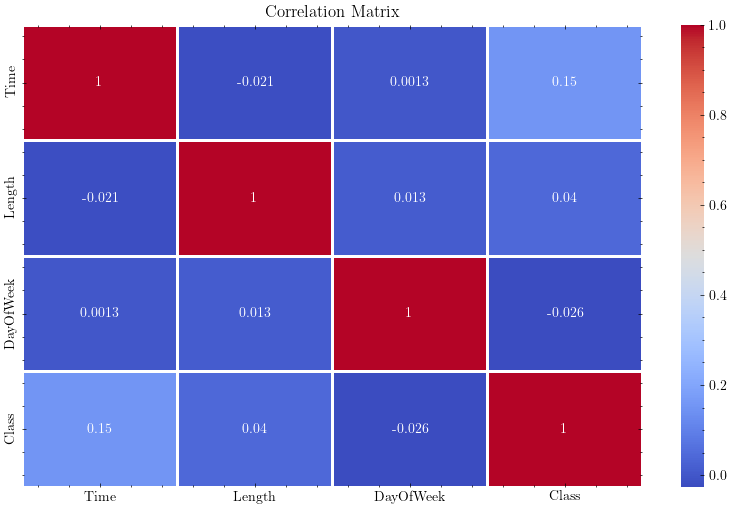

In [16]:
#seaborn correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(airlines.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.title('Correlation Matrix')

plt.savefig('figures/eda/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:

# airlines data assign hour and minute column using pd.to_datetime
airlines['Hour'] = pd.to_datetime(airlines['Time'], unit='m').dt.hour
airlines['Minute'] = pd.to_datetime(airlines['Time'], unit='m').dt.minute
airlines

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,Hour,Minute
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0,21,36
1,6948.0,360.0,146.0,OO,COS,ORD,4,0,6,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0,19,30
3,31.0,1410.0,344.0,US,OGG,PHX,6,0,23,30
4,563.0,692.0,98.0,FL,BMI,ATL,4,0,11,32
...,...,...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1,8,50
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1,9,20
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1,13,47
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1,11,55


In [18]:
airlines_delayed = airlines[airlines['Class'] == 1]
delay_by_hour = airlines_delayed.groupby('Hour')['Class'].count()

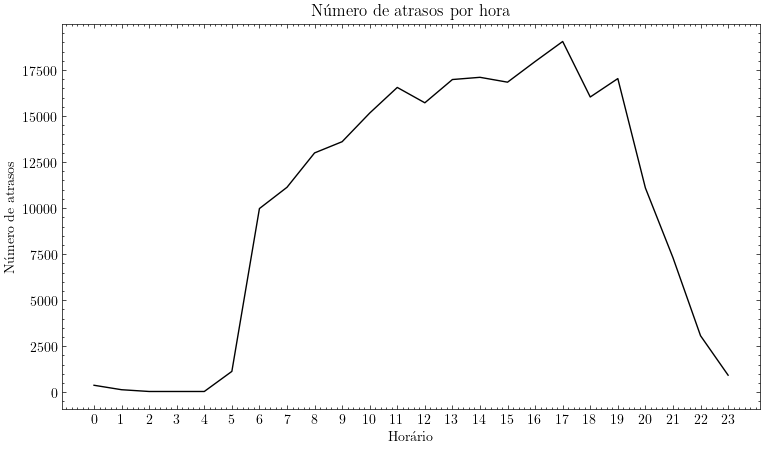

In [19]:
#plot
fig = plt.figure(figsize=(9, 5))
sns.lineplot(data=delay_by_hour, x=delay_by_hour.index, y=delay_by_hour.values, color='black')
plt.xlabel('Horário')
plt.ylabel('Número de atrasos')
plt.title('Número de atrasos por hora')
plt.xticks(np.arange(0, 24, 1))
#sns despine
#grayscale save
plt.savefig('figures/eda/delay_by_hour.png', dpi=300, bbox_inches='tight')
plt.show()

## *Feature Engineering*
-------------------


In [20]:
airlines

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,Hour,Minute
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0,21,36
1,6948.0,360.0,146.0,OO,COS,ORD,4,0,6,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0,19,30
3,31.0,1410.0,344.0,US,OGG,PHX,6,0,23,30
4,563.0,692.0,98.0,FL,BMI,ATL,4,0,11,32
...,...,...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1,8,50
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1,9,20
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1,13,47
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1,11,55


In [21]:
def feature_engineering_preprocessing(data):

    data = data.copy()

    # Creating Time-based Features
    data['TimeOfDay'] = pd.cut(data['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], include_lowest=True)
    data['Weekend'] = np.where(data['DayOfWeek'].isin([1, 7]), 1, 0)

    return data

In [22]:
airlines = feature_engineering_preprocessing(airlines)

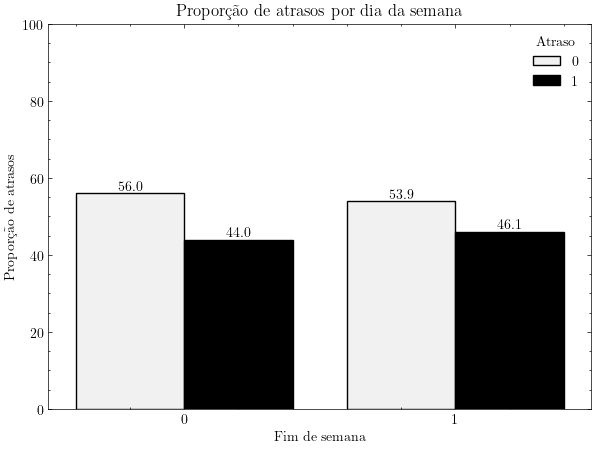

In [39]:
plt.figure(figsize=(7,5))
utils.plot_norm_countplot(airlines, category_col='Weekend', hue_col='Class', xticks_rotation=0, edgecolor='black',color='black',
                          title='Proporção de atrasos por dia da semana')

plt.xlabel('Fim de semana')
plt.ylabel('Proporção de atrasos')
plt.legend(loc='upper right', title='Atraso')
plt.savefig('figures/eda/weekend_delay.png', dpi=300, bbox_inches='tight')
plt.show()

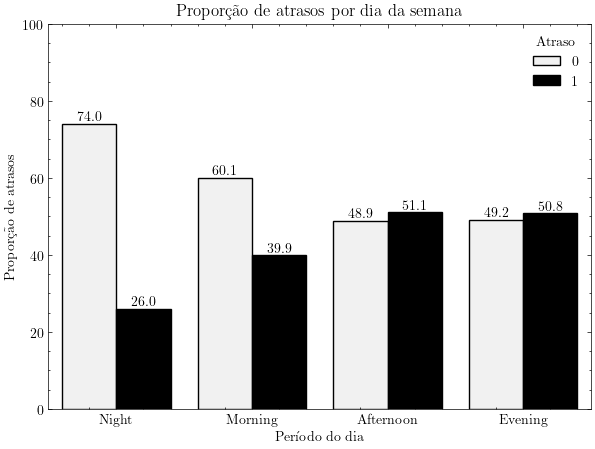

In [40]:
plt.figure(figsize=(7,5))
utils.plot_norm_countplot(airlines, category_col='TimeOfDay', hue_col='Class', 
                          xticks_rotation=0, edgecolor='black', title='Proporção de atrasos por dia da semana', color='black')
plt.xlabel('Período do dia')
plt.ylabel('Proporção de atrasos')
plt.legend(title='Atraso', loc='upper right')
plt.xticks(['Noite', 'Manhã', 'Tarde', 'Noite'])
plt.savefig('figures/eda/delay_by_timeofday.png', dpi=300, bbox_inches='tight')
plt.show()

## Modelagem

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def model_selection_workflow(X, y):
    # Define the preprocessing steps for each algorithm
    preprocessing_steps = {
        'svm': [('scaler', StandardScaler()), ('svm', SVC())],
        'random_forest': [('min_max_scaler', MinMaxScaler()), ('random_forest', RandomForestClassifier())],
        'logistic_regression': [('scaler', StandardScaler()), ('logistic_regression', LogisticRegression())]
    }

    # Define the hyperparameters to tune for each algorithm
    hyperparameters = {
        'svm': {
            'svm__C': [0.1, 1, 10],
            'svm__kernel': ['linear', 'rbf']
        },
        'random_forest': {
            'random_forest__n_estimators': [100, 200, 300],
            'random_forest__max_depth': [None, 5, 10]
        },
        'logistic_regression': {
            'logistic_regression__C': [0.1, 1, 10],
            'logistic_regression__penalty': ['l1', 'l2']
        }
    }

    # Perform model selection for each algorithm
    best_models = {}
    for algorithm, steps in preprocessing_steps.items():
        pipeline = Pipeline(steps)

        # Perform hyperparameter tuning using cross-validation
        grid_search = GridSearchCV(pipeline, hyperparameters[algorithm], cv=5)
        grid_search.fit(X, y)

        # Store the best model for each algorithm
        best_models[algorithm] = grid_search.best_estimator_

    return best_models



In [26]:
# Separate the features (X) and target variable (y)
X = airlines.drop("Class", axis=1)
y = airlines["Class"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply feature engineering and preprocessing after the split
X_train = feature_engineering_preprocessing(X_train)

In [27]:
# Define the column transformer for ordinal encoding and feature engineering
numeric_features = ['Hour', 'Length']
categorical_features = ['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'TimeOfDay', 'Weekend']

# preprocessor for decision tree and random forest
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ], remainder='drop')

# preprocessor for logreg
preprocessor_logreg = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='drop')

In [29]:
X_train_transformed = preprocessor_logreg.fit_transform(X_train)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_transformed, y_train)

print(f'Logistic Regression Train F1-Score: {f1_score(y_train, log_reg.predict(X_train_transformed), average="macro")}')
print(f'Logistic Regression Test F1-Score: {f1_score(y_test, log_reg.predict(preprocessor_logreg.transform(X_test)), average="macro")}')

Logistic Regression Train F1-Score: 0.6338255675207225
Logistic Regression Test F1-Score: 0.629139030556856


In [35]:
preprocessor_knn = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Hour', 'Length']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Airline', 'DayOfWeek', 'TimeOfDay', 'Weekend'])
    ], remainder='drop')

X_train_transformed = preprocessor.fit_transform(X_train)
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_transformed)

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_transformed, y_train)

print(f'KNN Train F1-Score: {f1_score(y_train, knn.predict(X_train_transformed), average="macro")}')
print(f'KNN Test F1-Score: {f1_score(y_test, knn.predict(scaler.transform(preprocessor.transform(X_test))), average="macro")}')

KNN Train F1-Score: 0.7379428372242147
KNN Test F1-Score: 0.6034579882804944


In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=32, n_jobs=-1)
rf_clf.fit(X_train_transformed, y_train)

print(f'Random Forest Train F1-Score', f1_score(y_train, rf_clf.predict(X_train_transformed)))
print(f'Random Forest Test F1-Score', f1_score(y_test, rf_clf.predict(preprocessor.transform(X_test))))

dt_clf = DecisionTreeClassifier(max_depth=10, random_state=32)
dt_clf.fit(X_train_transformed, y_train)

print(f'Decision Tree Train F1-Score', f1_score(y_train, dt_clf.predict(X_train_transformed)))
print(f'Decision Tree Test F1-Score', f1_score(y_test, dt_clf.predict(preprocessor.transform(X_test))))

0.7922119491161166
[0.10522468 0.26691202 0.12656761 0.16956617 0.1575298  0.13847341
 0.02320718 0.01251911]


In [ ]:
results = compare_algorithms(preprocessor_logreg_knn.fit_transform(X_train), y_train, [log_reg, knn])
results_tree_based = compare_algorithms(preprocessor.fit_transform(X_train), y_train, [dt_clf, rf_clf])

pd.concat([results, results_tree_based], axis=0)

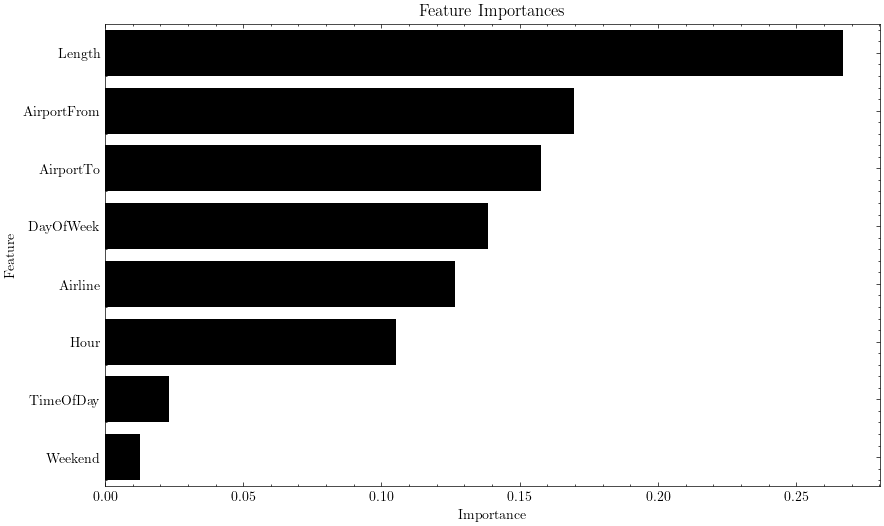

In [ ]:
# print feature importances
feature_importances = rf_clf.feature_importances_
feature_importances_df = pd.DataFrame({'feature': numeric_features + categorical_features, 'importance': feature_importances})

# plot feature importances
fig = plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances_df.sort_values(by='importance', ascending=False), x='importance', y='feature', color='black')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
#plt.savefig('figures/eda/feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()

**Overfitting?**

In [ ]:
# Define the algorithms to compare
algorithms = [DecisionTreeClassifier(max_depth=12), RandomForestClassifier(n_estimators=300, n_jobs=-1), 
              LogisticRegression(max_iter=1000, n_jobs=-1), KNeighborsClassifier(n_neighbors=5, n_jobs=-1)]

# Compare the algorithms
results = compare_algorithms(X_train, y_train, algorithms)


# Print the dataframe with the evaluation metrics
print(results)

Input data:
        Hour  Length Airline AirportFrom AirportTo DayOfWeek  TimeOfDay  \
471275     7   133.0      FL         MKE       BOS         7    Morning   
132519    14   135.0      XE         MKE       EWR         3  Afternoon   
359923    16   115.0      WN         HOU       TPA         5  Afternoon   
330084    15   117.0      DL         CVG       LGA         5  Afternoon   
143429    12   153.0      OO         DEN       PSC         4    Morning   
...      ...     ...     ...         ...       ...       ...        ...   
110268    13   157.0      YV         SAT       CLT         6  Afternoon   
259178     6   185.0      AA         BUR       DFW         5      Night   
365838    17   185.0      DL         DTW       FLL         2  Afternoon   
131932    19    70.0      WN         MDW       DTW         5    Evening   
121958     9   328.0      DL         JFK       SLC         6    Morning   

        Weekend  
471275        1  
132519        0  
359923        0  
330084        0

In [ ]:
best_model = results.sort_values(by='F1-Score', ascending=False).iloc[0]

print(f"Best model: {best_model['Model']}")

Best model: LogisticRegression
